***<span style="color:purple">SUPPORT VECTOR MACHINE</SPAN>***

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

***<span style="color:purple">Load_digits</SPAN>***

<h3>The load_digits dataset from scikit-learn is a commonly used dataset for testing and practicing machine learning algorithms. It is a set of 8x8 pixel images of handwritten digits, where each image is represented as a flattened array of 64 pixel values.</h3>

<h3>Here is some information about the load_digits dataset:</h3>

<p>load_digits() returns a Bunch object, which is similar to a dictionary, containing the following attributes:</p>
<ol>
<li>data: a 2D array of shape (n_samples, n_features) containing the flattened pixel values of each image</li>
<li>target: a 1D array of shape (n_samples,) containing the target values (i.e., the actual digits) for each image</li>
<li>target_names: a 1D array of shape (n_classes,) containing the names of the target classes</li>
<li>images: a 3D array of shape (n_samples, 8, 8) containing the original images in their 8x8 pixel format</li>
<li>DESCR: a description of the dataset</li>
    
</ol>
<p>The dataset contains 1797 samples (i.e., images) of handwritten digits from 0 to 9.</p>

<p>Each pixel value is an integer between 0 and 16, representing the grayscale intensity of the pixel. A pixel value of 0 corresponds to a white pixel, and a pixel value of 16 corresponds to a black pixel.</p>

</p>The task is to classify each image into one of the 10 digit classes (i.e., 0 to 9).</p>

In [218]:
from sklearn.datasets import load_digits
digit=load_digits()

In [219]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [220]:
df=pd.DataFrame(digit.data,columns=digit.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


**Loading handwritten images of digit**

<Figure size 640x480 with 0 Axes>

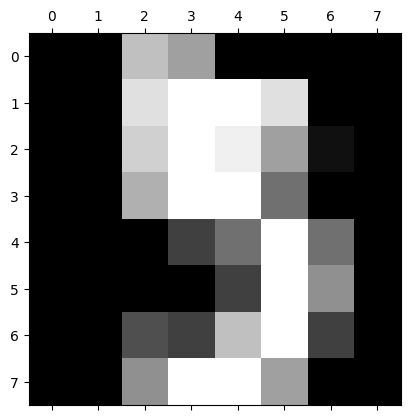

In [221]:
plt.gray() 
plt.matshow(digit.images[5]) 

In [222]:
df['target']=digit.target

In [223]:
df.head(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [224]:
df0=df[df.target==0]
df1=df[df.target==7]
df2=df[df.target==6]

Text(0, 0.5, 'pixel_7_4')

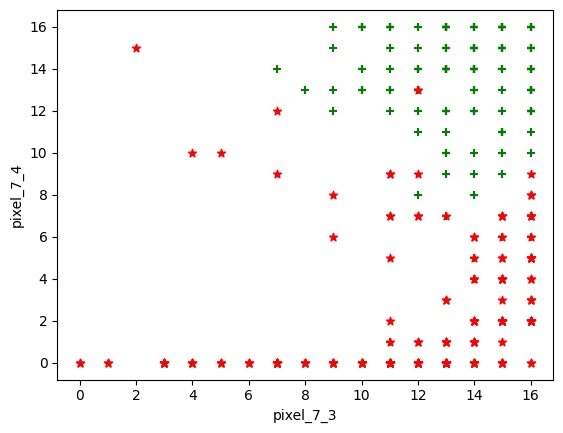

In [225]:
%matplotlib inline
plt.scatter(df0.pixel_7_3,df0.pixel_7_4,color="green",marker="+")
plt.scatter(df1.pixel_7_3,df1.pixel_7_4,color="red",marker="*")
plt.xlabel("pixel_7_3")
plt.ylabel("pixel_7_4")

Text(0, 0.5, 'pixel_6_4')

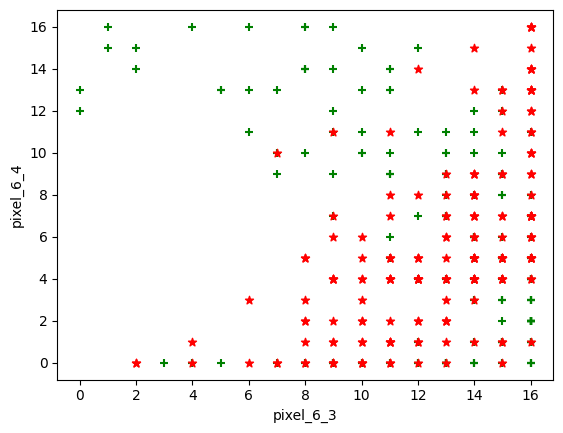

In [226]:
%matplotlib inline
plt.scatter(df1.pixel_6_3,df1.pixel_6_4,color="green",marker="+")
plt.scatter(df2.pixel_6_3,df2.pixel_6_4,color="red",marker="*")
plt.xlabel("pixel_6_3")
plt.ylabel("pixel_6_4")

In [227]:
target=digit.target

In [228]:
inputs=digit.data

In [229]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

<h6>Here's a brief explanation of some common parameters of the Support Vector Machine (SVM) algorithm:</h6>

<ol>
<li><h5 style="color:purple">Kernel:</h5> The kernel function specifies the type of hyperplane used to separate the data.
    SVMs use a kernel trick to transform the data into a higher-dimensional space where it can be linearly separated. 
    Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.
    The choice of kernel depends on the specific problem at hand.</li>

<li><h5 style="color:purple">Gamma:</h5> The gamma parameter controls the shape of the decision boundary. 
    When gamma is small, the decision boundary is smoother, and the model is more tolerant to
    noise in the training data. When gamma is large, the decision boundary is more complex, and the
    model is more likely to overfit to the training data.</li>

<li><h5 style="color:purple">C:</h5> The C parameter controls the trade-off between achieving a low training error and a low testing error.
    A small value of C will allow more misclassifications in the training data, leading to a larger margin and 
    a simpler model. A large value of C will try to classify all training examples correctly and result in a smaller 
    margin and a more complex model.</li>
</ol>
<p>In general, it is important to carefully tune these parameters to obtain the best performance for a given problem. High values of gamma or C can lead to overfitting and poor generalization performance, while low values of these parameters can result in underfitting and low accuracy. The optimal values for these parameters depend on the specific dataset and the problem at hand.</p>

In [230]:
from sklearn.svm import SVC
model=SVC(C=1,gamma='auto',kernel='poly')
print(model)

SVC(C=1, gamma='auto', kernel='poly')


In [231]:
model.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='poly')

In [232]:
model.score(x_test,y_test)

0.9925925925925926